<a href="https://colab.research.google.com/github/AnshUpadhyay639/BPE-Tokenizer/blob/main/BPE_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
String = "안녕하세요 👋 "

In [ ]:
[ord(ch) for ch in String] # Ord(ch) : Return the Unicode code point (extended ASCII with other language chars too) for a one-character string. Eg. Space = 32 [Vocab Size of Orb() = 150K][Supports 3 encodings: UTF-8,16,32].

[50504, 45397, 54616, 49464, 50836, 32, 128075, 32]

In [ ]:
chr(50504) # Revert Back.

'안'

In [ ]:
list(String.encode("utf-8")) # Encode in UTF-8 (4 Bytes Representation ---> 3 Digits)[Vocab size = 2^8 = 256 which is too low for us so we want to use Byte Pair Encodings].

[236,
 149,
 136,
 235,
 133,
 149,
 237,
 149,
 152,
 236,
 132,
 184,
 236,
 154,
 148,
 32,
 240,
 159,
 145,
 139,
 32]

In [ ]:
list(ascii(String))

["'",
 '\\',
 'u',
 'c',
 '5',
 '4',
 '8',
 '\\',
 'u',
 'b',
 '1',
 '5',
 '5',
 '\\',
 'u',
 'd',
 '5',
 '5',
 '8',
 '\\',
 'u',
 'c',
 '1',
 '3',
 '8',
 '\\',
 'u',
 'c',
 '6',
 '9',
 '4',
 ' ',
 '\\',
 'U',
 '0',
 '0',
 '0',
 '1',
 'f',
 '4',
 '4',
 'b',
 ' ',
 "'"]

# Byte Pair Encodings:
So we now make our vocab size larger than 256 by keeping the format same i.e.(utf-8). To do this we replace similar continuous pairs of characters with a new Character so now the Vocab_size = Vocab_size + 1 and so forth. Notice how we are also simultaneously compressing our Dataset too.

**More Info:** https://en.wikipedia.org/wiki/Byte_pair_encoding

In [ ]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = list(text.encode("utf-8")) # raw bytes
#tokens = list(map(int, tokens)) Alt : To convert to a list of integers in range 0..255 for convenience
print('---')
print(text)
print("length:", len(text))
print('---')
print(tokens)
print("length:", len(tokens))

---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements or (pairs).[Zip function takes List as Params and combines their 1st indexes and return tuples until the smallest list exhaust].
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens) # Returns a dict{} of Pair, Count.
#print(stats)
print(sorted(((v,k) for k,v in stats.items()), reverse=True)) # Sort w.r.t Values.[Reverse = True for Descending Order Sorting][Sorting on Tuples by default on the basis of 1st element in the tuple(v,k)].

[(20, (101, 32)), (15, (240, 159)), (12, (226, 128)), (12, (105, 110)), (10, (115, 32)), (10, (97, 110)), (10, (32, 97)), (9, (32, 116)), (8, (116, 104)), (7, (159, 135)), (7, (159, 133)), (7, (97, 114)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (6, (116, 32)), (6, (114, 32)), (6, (111, 114)), (6, (110, 103)), (6, (110, 100)), (6, (109, 101)), (6, (104, 101)), (6, (101, 114)), (6, (32, 105)), (5, (117, 115)), (5, (115, 116)), (5, (110, 32)), (5, (100, 101)), (5, (44, 32)), (5, (32, 115)), (4, (116, 105)), (4, (116, 101)), (4, (115, 44)), (4, (114, 105)), (4, (111, 117)), (4, (111, 100)), (4, (110, 116)), (4, (110, 105)), (4, (105, 99)), (4, (104, 97)), (4, (103, 32)), (4, (101, 97)), (4, (100, 32)), (4, (99, 111)), (4, (97, 109)), (4, (85, 110)), (4, (32, 119)), (4, (32, 111)), (4, (32, 102)), (4, (32, 85)), (3, (118, 101)), (3, (116, 115)), (3, (116, 114)), (3, (116, 111)), (3, (114, 116)), (3, (114, 115)), (3, (114, 101)), (3, (111, 102)), (3, (111, 32)), (3, (108, 108)), (

In [ ]:
top_pair = max(stats, key=stats.get) # Ranking on the basis of Value i.e.('stats.get' fetches value).
top_pair

(101, 32)

In [ ]:
def merge(ids, pair, idx): # [ids = Token: List[int] ; idx = new index of pair].
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = [] # Stores the new indices.
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]: # Handle edge case for last element index.
      newids.append(idx) # Rewrite the new idx.
      i += 2 # Skip over the entire pair.
    else:
      newids.append(ids[i]) # Copy the element/idx if no match found.
      i += 1 # Skip by 1 as no pair scenario.
  return newids

print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99)) # The whole pair will be replaced by 99 and hence the data is compressed.

tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length:", len(tokens2)) # Tokens -= 20 as Max Pair occured 20 times && Vocab_size += 1.

[5, 6, 99, 9, 1]
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 

In [ ]:
import unicodedata
def replace_control_characters(s: str) -> str:
    # we don't want to print control characters
    # which distort the output (e.g. \n or much worse)
    chars = []
    for ch in s:
        if unicodedata.category(ch)[0] != "C":
            chars.append(ch) # this character is ok
        else:
            chars.append(f"\\u{ord(ch):04x}") # escape
    return "".join(chars)

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

vocab_size = 276 # The desired final vocabulary size.
num_merges = vocab_size - 256
ids = list(tokens) # Copy so we don't destroy the original list.

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids) # Get pairs of Values/Counts.
  pair = max(stats, key=stats.get) # Pop the Max Count/Value pair.
  idx = 256 + i # New Vocab Index ; OG:[0-255].
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (101, 32) into a new token 256
merging (240, 159) into a new token 257
merging (226, 128) into a new token 258
merging (105, 110) into a new token 259
merging (115, 32) into a new token 260
merging (97, 110) into a new token 261
merging (116, 104) into a new token 262
merging (257, 133) into a new token 263
merging (257, 135) into a new token 264
merging (97, 114) into a new token 265
merging (239, 189) into a new token 266
merging (258, 140) into a new token 267
merging (267, 264) into a new token 268
merging (101, 114) into a new token 269
merging (111, 114) into a new token 270
merging (116, 32) into a new token 271
merging (259, 103) into a new token 272
merging (115, 116) into a new token 273
merging (261, 100) into a new token 274
merging (32, 262) into a new token 275


In [ ]:
print("tokens length:", len(tokens))
print("New Token/ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 616
New Token/ids length: 451
compression ratio: 1.37X


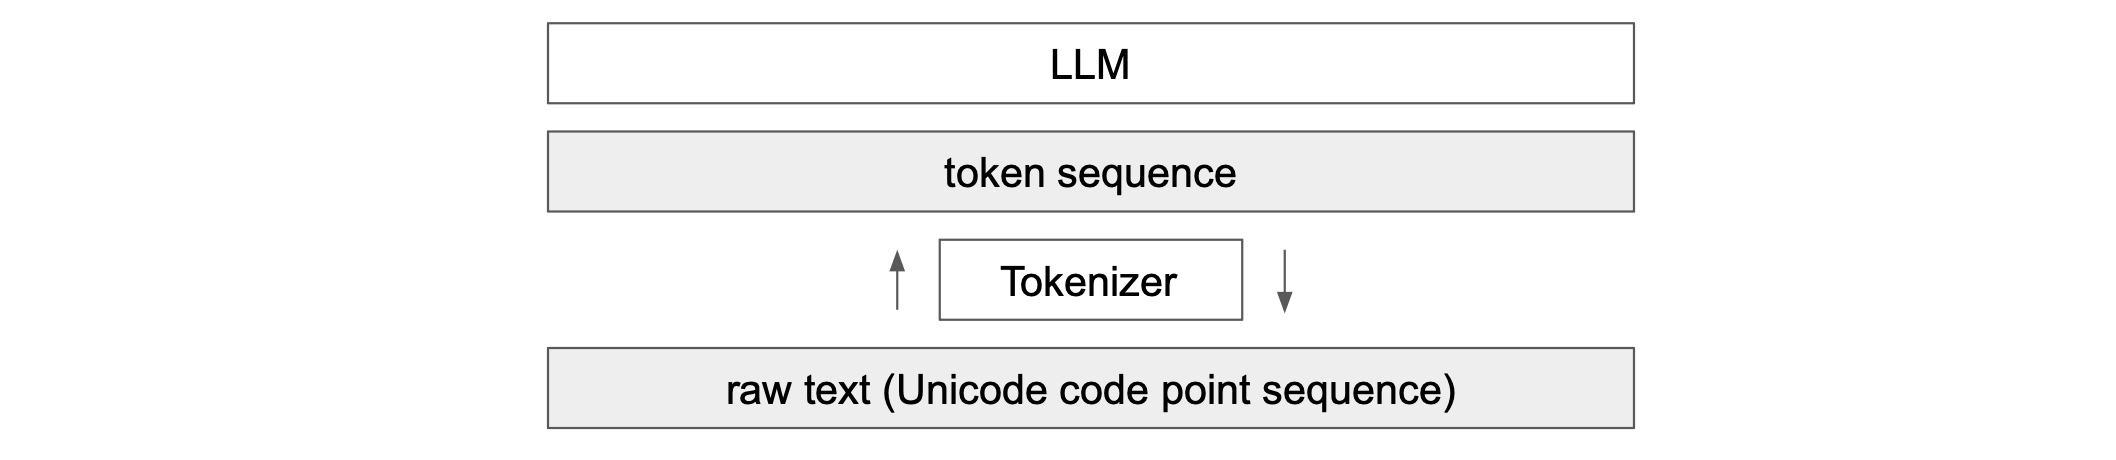

In [ ]:
# Make a Decoder which Converts Tokens to Raw Text:
vocab = {idx : bytes([idx]) for idx in range(256)} # If no. in range[0-255] then convert them back to byte code and index them in a dict{}.[For idx > 255 ; We dont Convert them into Bytes].
for (a, b), idx in merges.items():
  vocab[idx] = vocab[a] + vocab[b] # Addition of Byte pairs back to a single number.

def decode(ids):
  # given ids (list of integers), returns Python String.
  tokens = b"".join(vocab[idx] for idx in ids) # Byte Join (b"").
  text = tokens.decode("utf-8", errors="replace") # errors="replace" ensures accurate conversion to utf-8 format.
  return text

print(decode([128]))

�


In [ ]:
next(iter(merges.items())), next(iter(vocab.items())), list(vocab)[0], next(iter(stats.items()))

(((101, 32), 256), (0, b'\x00'), 0, ((239, 188), 1))

In [ ]:
# Make an Encoder that Converts Raw Text to Tokens:
def encode(text): # Another Text but built by using the Same Vocab.
  # given a string, return list of integers (the tokens).
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2: # Base Case of Input Text.
    stats = get_stats(tokens) # returns a Dict{} of pairs with their counts.
    pair = min(stats, key=lambda p: merges.get(p, float("inf"))) # Get min w.r.t function: p represents each Key (by default) in stats as min() iterates over it. [Return merges.get(infinite) does nothing if the pair isnt found]
    if pair not in merges: # min() finds the key in stats that has the smallest corresponding value in merges (or float("inf") if missing).
      break # nothing else can be merged in text pairs.
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode("Hello"))

[72, 101, 108, 108, 111]


**Note:** If the text is "hello hello", the most frequent pair (like ("he", 2)) would be the one chosen for merging first, reducing the size of the text in the most optimal way. Thats why we use Min() function above.

In [ ]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


In [ ]:
# Optimization on Raw Text Before Merging:
import regex as re
# 've , 't, 're , 'll, etc. are common occurences in English so we want the model to learn them so they will come out separately.
# \p{L}: Followed by a Space it Matches any Unicode letter (equivalent to [a-zA-Z] in ASCII but also includes characters from other languages, like é, ß, ж, etc.).[\p{N} : For Numbers].
# +: Matches one or more occurrences of the preceding token (\p{L}), meaning it matches full words consisting of letters.
# \s+: Matches one or more whitespace characters (spaces, tabs, newlines, etc.).
# ?!\S: ensures that the whitespace is not followed by a non-whitespace character.
# ?[^\s\p{L}\p{N}]+ : Matches anything that is neither a Letter nor a Number i.e.(For Punctuations).
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are    you!!!?")) # Returns a List of all strings that matched the regex.

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', '   ', ' you', '!!!?']


**Note:** The reason we do this is to merge words with the same context. Like ***Hello***'s any two chars will merge and not ***{'o' with '(Apostrophe)}*** or ***{'d','1'}*** or ***{e," "(space)}***, etc. Merging will now be apllied to each word of this List separately.

In [ ]:
!pip install tiktoken # Library for Tokenization of any text [By OpenAI].

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00


In [ ]:
import tiktoken
# GPT-2's Tokenizer does not merge spaces which leads to Large Encoding of Input (Where 3 tokens = 220 (space)) and is also computationally inefficient.
enc1 = tiktoken.get_encoding("gpt2")
print(enc1.encode("    hello world!!!"))

dec = enc1.decode(enc1.encode("Random Text")) # OpenAI Decoder needs an Encoded Input.

# GPT-4 Tokenizer merges spaces.
enc2 = tiktoken.get_encoding("cl100k_base")
print(enc2.encode("    hello world!!!")) # It treats multiple whitespaces as a Single Token = 262.

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


In [ ]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges

--2025-02-07 18:35:28--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [application/octet-stream]
Saving to: ‘vocab.bpe’

vocab.bpe           100%[===================>] 445.62K   585KB/s    in 0.8s    

2025-02-07 18:35:29 (585 KB/s) - ‘vocab.bpe’ saved [456318/456318]

--2025-02-07 18:35:29--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving t

In [ ]:
# GPT-2 has Vocab size of 50257:
len(encoder) # 256 raw byte tokens + 50,000 merges. +1 special token i.e(<EOT>)

50257

In [ ]:
encoder['<|endoftext|>'] # Range[0-50256] ; So this is the Last Character.[This doesnt merge].

50256

In [ ]:
def render_token(t: bytes) -> str:
    # pretty print a token, escaping control characters
    s = t.decode('utf-8', errors='replace')
    s = replace_control_characters(s)
    return s

In [ ]:
# To Summarize:
class Tokenizer:
    """Base class for Tokenizers"""

    def __init__(self):
        # default: vocab size of 256 (all bytes), no merges, no patterns
        self.merges = {} # (int, int) -> int
        self.pattern = "" # str
        self.special_tokens = {} # str -> int, e.g. {'<|endoftext|>': 100257}
        self.vocab = self._build_vocab() # int -> bytes

    def train(self, text, vocab_size, verbose=False):
        # Tokenizer can train a vocabulary of size vocab_size from text
        raise NotImplementedError

    def encode(self, text):
        # Tokenizer can encode a string into a list of integers
        raise NotImplementedError

    def decode(self, ids):
        # Tokenizer can decode a list of integers into a string
        raise NotImplementedError

    def _build_vocab(self):
        # vocab is simply and deterministically derived from merges
        vocab = {idx: bytes([idx]) for idx in range(256)}
        for (p0, p1), idx in self.merges.items():
            vocab[idx] = vocab[p0] + vocab[p1]
        for special, idx in self.special_tokens.items():
            vocab[idx] = special.encode("utf-8")
        return vocab

    def save(self, file_prefix):
        """
        Saves two files: file_prefix.vocab and file_prefix.model
        This is inspired (but not equivalent to!) sentencepiece's model saving:
        - model file is the critical one, intended for load()
        - vocab file is just a pretty printed version for human inspection only
        """
        # write the model: to be used in load() later
        model_file = file_prefix + ".model"
        with open(model_file, 'w') as f:
            # write the version, pattern and merges, that's all that's needed
            f.write("minbpe v1\n")
            f.write(f"{self.pattern}\n")
            # write the special tokens, first the number of them, then each one
            f.write(f"{len(self.special_tokens)}\n")
            for special, idx in self.special_tokens.items():
                f.write(f"{special} {idx}\n")
            # the merges dict
            for idx1, idx2 in self.merges:
                f.write(f"{idx1} {idx2}\n")
        # write the vocab: for the human to look at
        vocab_file = file_prefix + ".vocab"
        inverted_merges = {idx: pair for pair, idx in self.merges.items()}
        with open(vocab_file, "w", encoding="utf-8") as f:
            for idx, token in self.vocab.items():
                # note: many tokens may be partial utf-8 sequences
                # and cannot be decoded into valid strings. Here we're using
                # errors='replace' to replace them with the replacement char �.
                # this also means that we couldn't possibly use .vocab in load()
                # because decoding in this way is a lossy operation!
                s = render_token(token)
                # find the children of this token, if any
                if idx in inverted_merges:
                    # if this token has children, render it nicely as a merge
                    idx0, idx1 = inverted_merges[idx]
                    s0 = render_token(self.vocab[idx0])
                    s1 = render_token(self.vocab[idx1])
                    f.write(f"[{s0}][{s1}] -> [{s}] {idx}\n")
                else:
                    # otherwise this is leaf token, just print it
                    # (this should just be the first 256 tokens, the bytes)
                    f.write(f"[{s}] {idx}\n")

    def load(self, model_file):
        """Inverse of save() but only for the model file"""
        assert model_file.endswith(".model")
        # read the model file
        merges = {}
        special_tokens = {}
        idx = 256
        with open(model_file, 'r', encoding="utf-8") as f:
            # read the version
            version = f.readline().strip()
            assert version == "minbpe v1"
            # read the pattern
            self.pattern = f.readline().strip()
            # read the special tokens
            num_special = int(f.readline().strip())
            for _ in range(num_special):
                special, special_idx = f.readline().strip().split()
                special_tokens[special] = int(special_idx)
            # read the merges
            for line in f:
                idx1, idx2 = map(int, line.split())
                merges[(idx1, idx2)] = idx
                idx += 1
        self.merges = merges
        self.special_tokens = special_tokens
        self.vocab = self._build_vocab()

# **SentencePiece** (Trains ur own Vocab from Scratch):

- Commonly used because (unlike **tiktoken**) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

- **Sentencepiece** runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead and makes a new token itself.

- **SentencePiece** allows training a custom tokenizer suited for a specific dataset, ensuring efficient tokenization.

- Works well for languages with no clear word boundaries (e.g.: Chinese, Japanese, Thai, etc).

In [ ]:
# Alternative to "tiktoken (for GPTs)":
import sentencepiece as spm # Used to Train Custom

In [ ]:
# write a toy.txt file with some random text
with open("Text.txt", "w", encoding="utf-8") as f: # Create a file (if not exists) and then write to it.
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

In [ ]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="Text.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995, #[99.95%] Controls the percentage of characters in the input corpus to be included in the model’s vocabulary.[Excludes the Char that rarely occurs (Once)].
  byte_fallback=True, # If UNK token found then Byte encode them and return a new token instead of 0.
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist and is encoded to 0.
  bos_id=1, # the others are optional, set to -1 to turn off.
  eos_id=2, # end of string.
  pad_id=-1, # to pad strings.
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [ ]:
sp = spm.SentencePieceProcessor() # Creates a token400 model.
sp.load('tok400.model') # Load it.
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [ ]:
ids = sp.encode("hello 안녕하세요")
print(ids)

[362, 378, 361, 372, 358, 362, 239, 152, 139, 238, 136, 152, 240, 152, 155, 239, 135, 187, 239, 157, 151]


In [ ]:
print([sp.id_to_piece(idx) for idx in ids]) # See how the korean chars are UNK but due to "byte_fallback = True" they get byte encoded and becomes a new token.

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xEC>', '<0x95>', '<0x88>', '<0xEB>', '<0x85>', '<0x95>', '<0xED>', '<0x95>', '<0x98>', '<0xEC>', '<0x84>', '<0xB8>', '<0xEC>', '<0x9A>', '<0x94>']
